# Ahmed Abd-Elsalam Muhammed Afify

In [1]:
#importing all the libraries which are neede
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

# Step_1:

In [6]:
df=pd.read_csv('Mall_Customers.csv')# Step_1:

# Step_2:

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# mapping males and females to numerical notation
Genre_values = {'Male': 1, 'Female': 0}
df['Genre']=df['Genre'].map(Genre_values)

In [13]:
#, , 
df['Genre'] = df['Genre'].astype(float)
df['Age'] = df['Age'].astype(float)
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(float)

In [14]:
# Droppin nulls and duplicates
print(df.shape)
df.dropna()
df.drop_duplicates
print(df.shape)

(200, 5)
(200, 5)


# Step_3:

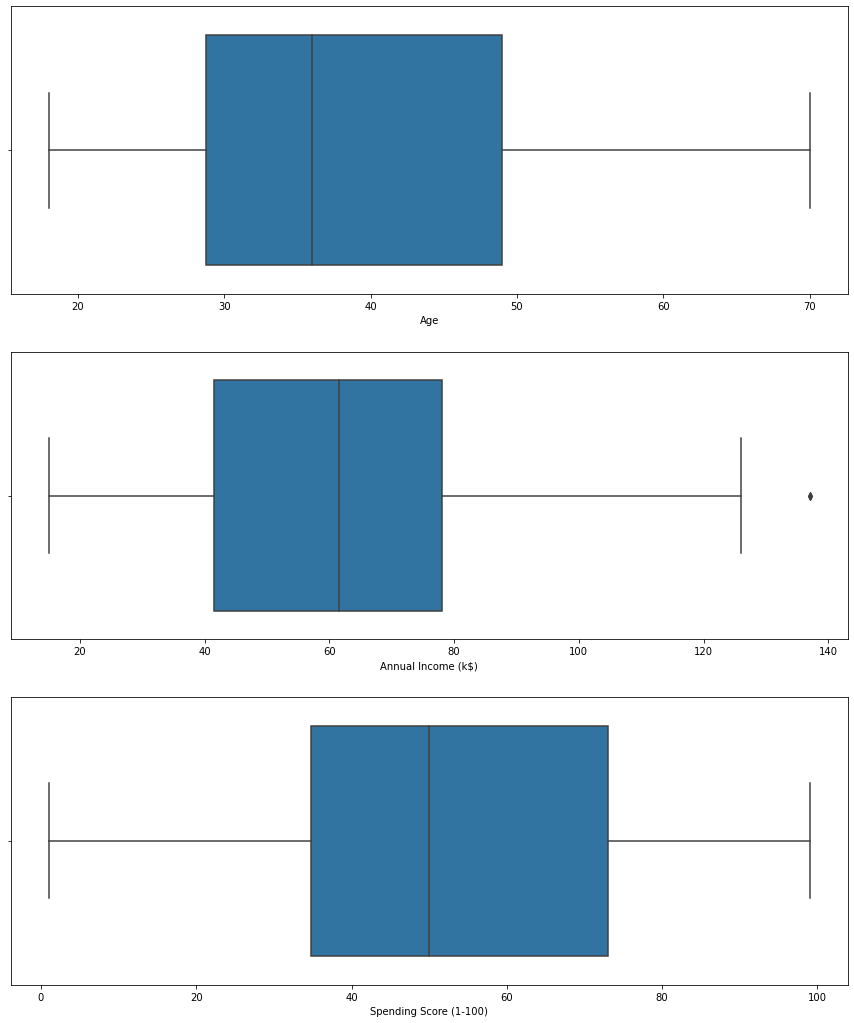

In [16]:
#Box Plot for each input variable
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
f, axes = plt.subplots(len(features), figsize = (15,18))
for i,j in enumerate(features):
    sns.boxplot(x=j,data=df, ax=axes[i])

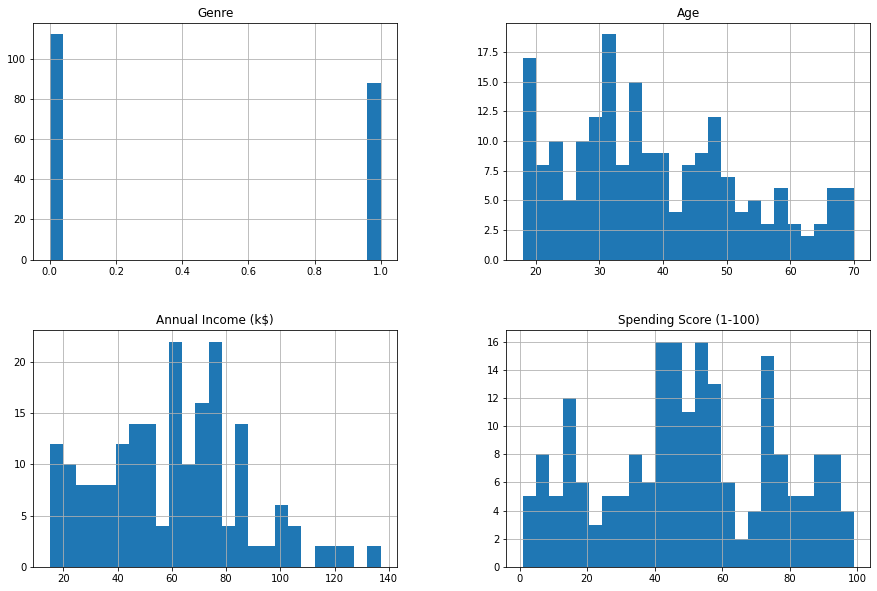

In [23]:
df.drop(columns=['CustomerID']).hist(figsize=(15,10),bins=25)
plt.show()

In [25]:
df.iloc[:,1:].corr()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


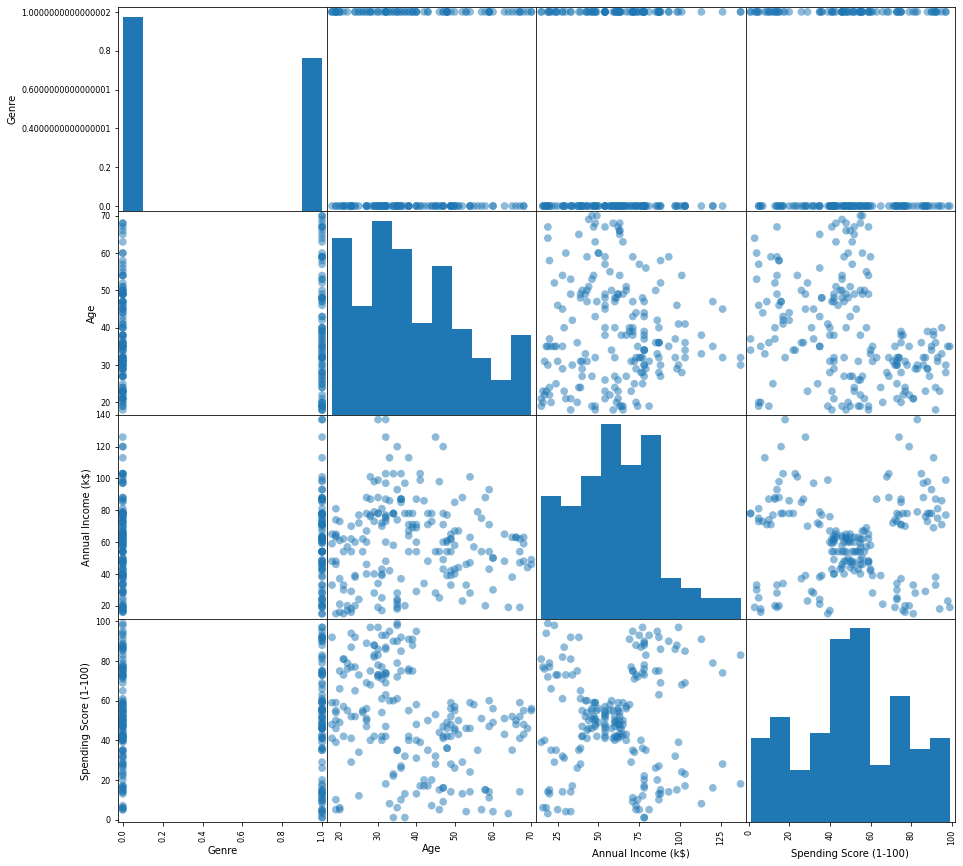

In [26]:
pd.plotting.scatter_matrix(df.iloc[:,1:], figsize=(15,15), s=60, marker='o')
plt.show()

# Steps 4,5,6:

## Training the model and getting insights:

In [125]:
def Linear_GD(x, y, alpha=0.1, epoches=1000):
    # initialize the parameters:
    m = x.shape[0]
    Xs = np.concatenate((np.ones((m,1)), x), axis=1)
    thetas = np.ones((Xs.shape[1],1))
    yhat = np.zeros((m,1))
    loss_lst = []

    # Implementing Iterations:
    for i in range(epoches):
        yhat = Xs @ thetas
        error = np.subtract(yhat, y)
        J_loss = (1/(2*m)) * np.sum(np.power(error,2))
        grd = (1/m) * (Xs.T @ error).reshape(-1,1)
        thetas = thetas - alpha*grd
        loss_lst.append(J_loss)

            
    return thetas, yhat, loss_lst

## Trying to fit the model:

In [128]:
y_gd = df['Spending Score (1-100)'].to_numpy().reshape(-1, 1)
x_gd = df[['Age', 'Annual Income (k$)']].to_numpy()

x_gd= (x_gd-x_gd.mean()) /x_gd.std()

x_train_gd, x_test_gd, y_train_gd, y_test_gd = train_test_split(x_gd,y_gd,test_size=1/3,random_state=0)

In [129]:
thetas, yhat, loss_lst = Linear_GD(x_train_gd, y_train_gd, 0.01, 1000)

In [130]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')
print(f'theta_3 = {thetas[2]}')

theta_0 = [44.70337701]
theta_1 = [-11.7665609]
theta_3 = [-1.22343225]


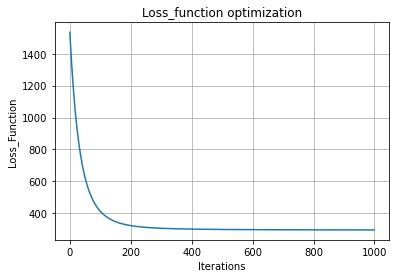

In [131]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

In [132]:
# Calculating goodness of fit of the line:
ybar = np.mean(y_train)
SStot = np.sum((y_train-ybar)**2)
SSres = np.sum((y_train-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.07255087173880004


## Trting to change hyperparameter:

In [133]:
thetas, yhat, loss_lst = Linear_GD(x_train_gd, y_train_gd, 0.001, 10000)

In [134]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')
print(f'theta_3 = {thetas[2]}')

theta_0 = [44.70089253]
theta_1 = [-11.76966045]
theta_3 = [-1.2229324]


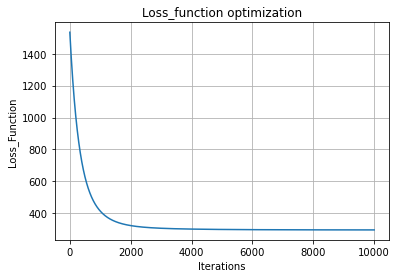

In [135]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

In [136]:
# Calculating goodness of fit of the line:
ybar = np.mean(y_train)
SStot = np.sum((y_train-ybar)**2)
SSres = np.sum((y_train-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.07254984641495588


## SkLearn model:

In [138]:
y = df['Spending Score (1-100)'].to_numpy().reshape(-1, 1)
x = df[['Age', 'Annual Income (k$)']].to_numpy()
model = LinearRegression()

In [139]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
train_score = []
test_score = []
for i in splits:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i,random_state=0)
    model.fit(x_train,y_train)

    r2_train = model.score(x_train,y_train)
    r2_test = model.score(x_test,y_test)
    
    train_score.append(r2_train)
    test_score.append(r2_test)
    
    print(f'Test_Size= ({i}):')
    print(f'R2_Train= {r2_train}')
    print(f'R2_Test= {r2_test}\n')

print('_______________________ Averages _______________________')
print(f'Avg. R2_Traing= {sum(train_score)/len(train_score)}')
print(f'Avg. R2_Test= {sum(test_score)/len(test_score)}')

Test_Size= (0.1):
R2_Train= 0.08476794591779313
R2_Test= 0.21466192974220155

Test_Size= (0.2):
R2_Train= 0.07777235395116733
R2_Test= 0.17656271410768942

Test_Size= (0.3):
R2_Train= 0.07283457085232958
R2_Test= 0.1402849991664279

Test_Size= (0.4):
R2_Train= 0.09099787155450278
R2_Test= 0.09327419425287664

Test_Size= (0.5):
R2_Train= 0.10875333726801828
R2_Test= 0.05645626785144364

_______________________ Averages _______________________
Avg. R2_Traing= 0.08702521590876222
Avg. R2_Test= 0.13624802102412784


In [140]:
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_[0])

Intercept: 77.50425851674395
Coefficients: [-0.50578785 -0.13653469]


## Deterministic model:

In [141]:
coeff = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

print("Coefficients:\n", coeff)

Coefficients:
 [[0.43379622]
 [0.46582184]]


In [142]:
y = df['Spending Score (1-100)']
yhat = np.array(x.dot(b)).ravel()

# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= -0.4607336087420091


# Predicting using three models:

### Using GD:

In [143]:
m_test = x_test_gd.shape[0]
Xs = np.concatenate((np.ones((m_test,1)), x_test_gd), axis=1)
y_pre_gd = Xs @ thetas
print(y_pre_gd[0])

[44.93992869]


### Using SkLearn Model:

In [146]:
y_predicted = model.predict(x_test)
print(y_predicted[0])

[48.06299227]


### Using Deterministic model:

In [151]:
y_pre = x_test @ coeff
print(y_pre[0])

[33.27130568]
